# Explore Ford GoBike System Data
## by Manish Kumar

## Preliminary Wrangling

The dataset contains the trip details for Ford GoBike taken in 2017. Each trip is anonymized and includes:
* Trip Duration (seconds)
* Start Time and Date
* End Time and Date
* Start Station ID
* Start Station Name
* Start Station Latitude
* Start Station Longitude
* End Station ID
* End Station Name
* End Station Latitude
* End Station Longitude
* Bike ID
* User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

We will exploring the dataset for various trends.

In [321]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## Data gathering 
The data was downloaded from this source https://s3.amazonaws.com/baywheels-data/index.html where it is available in a single file compiled for the year 2017

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [322]:
df = pd.read_csv('2017-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


### What is the structure of your dataset?

> The datsset contains records of 519699 trips, basic deatils(13 columns) of the trip and what type of a user took the ride, when, where did they start and end the trip etc.

### What is/are the main feature(s) of interest in your dataset?

> The main feature of interest for me are
* The duration of the ride
* The distance of the rides
* The user type taking the rides
* The day of week/month of ride 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The below features will help me 
* duration_sec, start_time, end_time
* start_station_latitude, start_station_longitude
* end_station_longitude, end_station_latitude

## Data Wrangling
> In this section we will explore and clean the data for possible issues and add/derive some additional columns that will help in the analysis
* Check for missing records in the fields of interest
* Check for duplicated records if any
* check for data type issues for e.g. the start_time/end_time are not in proper format
* Calculate the distance of the ride using the start and ending coordinates
* Extract the month and day of week from the start/end time

In [324]:
df.shape

(519700, 13)

In [325]:
# check if there are any records with out start location details
df.start_station_latitude.value_counts().sum(), df.start_station_longitude.value_counts().sum()

(519700, 519700)

In [326]:
# check if there are any records with out end location details
df.end_station_latitude.value_counts().sum(), df.end_station_longitude.value_counts().sum()

(519700, 519700)

In [327]:
# Check if there are missing records for duration of ride
df.duration_sec.value_counts().sum()

519700

In [328]:
# check if there are any duplicated records
df.duplicated().sum()

0

In [329]:
# function that calculates the distance between two geographical coordinates in kms base on this solution at below link
# https://gist.github.com/rochacbruno/2883505
import math
def calculateDistance(row):
    lat1 = row['start_station_latitude']
    lon1 = row['start_station_longitude']
    lat2 = row['end_station_latitude']
    lon2 = row['end_station_longitude']
    radius = 6371 # km radius of earth
    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c
    return d

In [330]:
df['distance'] = df.apply(lambda row: calculateDistance(row), axis=1)

In [331]:
df.distance.head()

0    0.942931
1    3.069727
2    0.000000
3    1.046622
4    0.636339
Name: distance, dtype: float64

In [332]:
# after calculating the distance the longitude and latitude coordinates are not required anymore and can be deleted
coords_cols = ['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude']
df.drop(coords_cols, axis=1, inplace=True)

In [333]:
# test if the columns were removed propelry
assert tuple(coords_cols) not in df.columns

In [334]:
# change start_time to date time
df.start_time = df.apply(lambda row: pd.to_datetime(row.start_time), axis=1)

In [335]:
# change end_time to date time
df.end_time = df.apply(lambda row: pd.to_datetime(row.end_time), axis=1)

In [85]:
# check if the type was changed properly
assert df.start_time.dtype != 'object' and df.end_time.dtype != 'object'

In [336]:
# add a derived column for day of the week and month etc.
df['day_of_week'] = df.apply(lambda row: row.start_time.day_name(), axis = 1)
df['month'] = df.apply(lambda row: row.start_time.month_name(), axis = 1)

In [337]:
def getTimeOfDay(time):
    hour = time.hour
    if hour >= 12 and hour <= 16:
        return 'Afternoon'
    if hour > 16 and hour <= 19:
        return 'Evening'
    if hour > 0 and hour < 6 and hour > 19 and hour < 23:
        return 'Night'
    if hour >= 6 and hour < 12:
        return 'Morning'

In [338]:
# create a column for day time i.e evening/afternoon/evening/night
df['day_time'] = df['start_time'].apply(lambda time: getTimeOfDay(time))

In [206]:
# test if the columns was added
assert 'day_of_week' and 'month' and 'day_time' in df.columns

In [139]:
# ride start and end location is same
df[df.start_station_id == df.end_station_id].shape[0]

18134

In [146]:
df[df.duration_sec < 100].shape[0]

2476

In [114]:
df.describe()

,duration_sec,start_station_id,end_station_id,bike_id,distance
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000
mean,1099.009521,95.034245,92.184041,1672.533079,1.587077
std,3444.146451,86.083078,84.969491,971.356959,1.010391
min,61.000000,3.000000,3.000000,10.000000,0.000000
25%,382.000000,24.000000,23.000000,787.000000,0.899642
50%,596.000000,67.000000,66.000000,1728.500000,1.400244
75%,938.000000,139.000000,134.000000,2520.000000,2.072494
max,86369.000000,340.000000,340.000000,3733.000000,68.186787


In [339]:
# save the clean dataset for future use
df.to_csv('bikes_clean.csv', index=False)

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

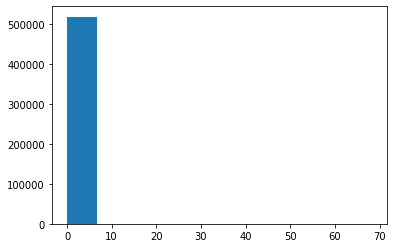

In [130]:
# explore how distance of ride distribution looks like
df.distance.hist()
plt.grid(b=None)

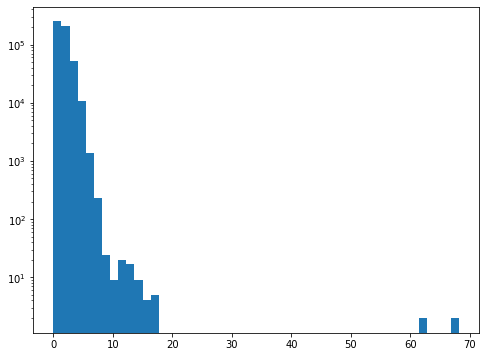

In [174]:
# It seems like that most of the rides are under 10 kms longs so lets decrease the bin size and apply logarithmic scaling
plt.figure(figsize=[8, 6])
df.distance.hist(bins=50, log=True)
plt.grid(b=None)

> After applying smaller bin size and logarithmic scaling it clearly is evident that the distribution is right skewed with some outliers. Most of the rides taken are less than 10kms long. Which clearly means the bikes are mostly used for short distance rides. Lets see what does the distribution of length of ride in terms of time(seconds) looks like.
Also it seems like there is quite a few rides with distance as 0 which means that that the start location and end location of the ride were the same, which also may give rise to assumption that the bikes are used for short trips to place where people usually visit for short time like malls, grocery stores etc.

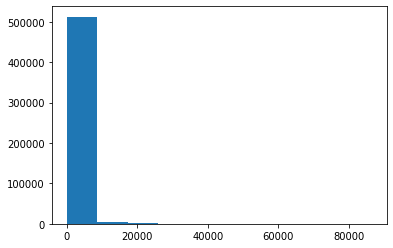

In [133]:
# create a histogram for duration of ride
df.duration_sec.hist()
plt.grid(b=None)

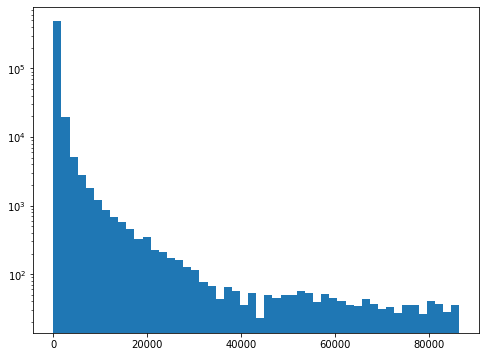

In [170]:
# It seems like that most of the rides are under 10000 secs so lets decrease the bin size and apply logarithmic scaling
plt.figure(figsize=[8, 6])
df.duration_sec.hist(bins=50, log=True)
plt.grid(b=None)

> After applying the logarithmic scaling of the histogram nd increasing the bin count it clearly seems like the distribution is right skewed and majority of the rides were less than 40000 secs in duration.
Next we will explore the trends based on months of year.

Text(0.5, 1.0, 'Number of rides in each month')

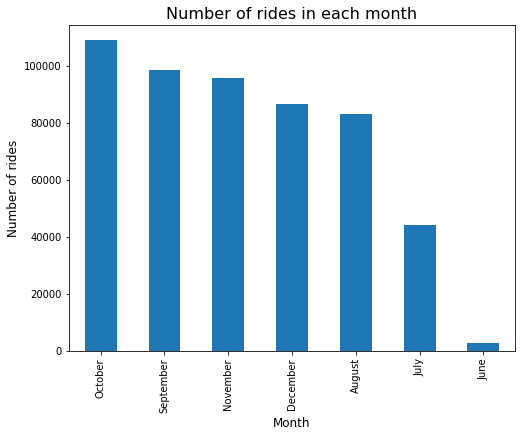

In [176]:
# plot a graph to see how many rides are taken each month
plt.figure(figsize=[8, 6])
df.groupby('month').count().sort_values('duration_sec', ascending=False).duration_sec.plot(kind='bar')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of rides', fontsize=12)
plt.title('Number of rides in each month', fontsize=16)

Text(0.5, 1.0, 'Number of rides on days of week')

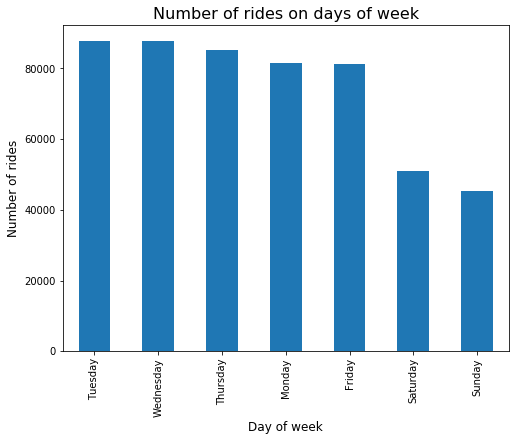

In [179]:
# plot a graph to see how many rides were taken on different weekdays
plt.figure(figsize=[8, 6])
df.groupby('day_of_week').count().sort_values('duration_sec', ascending=False).duration_sec.plot(kind='bar')
plt.xlabel('Day of week', fontsize=12)
plt.ylabel('Number of rides', fontsize=12)
plt.title('Number of rides on days of week', fontsize=16)

> The above plot clearly shows that the maximum number of rides were taken in the month on October and the least in June. For the month before June either there were no rides taken or the data is not available for those months.

Text(0.5, 1.0, 'Number of rides by user type')

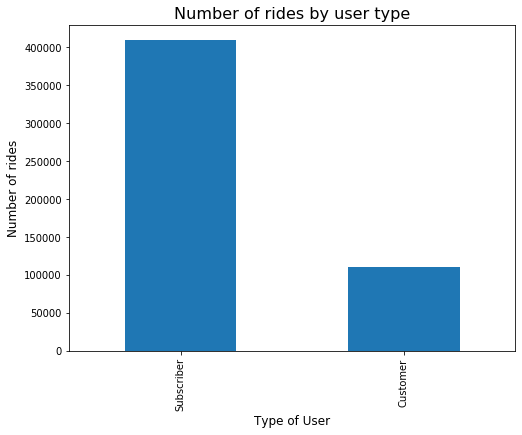

In [180]:
# plot a graph for number of rides taken by customers and subscribers
plt.figure(figsize=[8, 6])
df.groupby('user_type').count().sort_values('duration_sec', ascending=False).duration_sec.plot(kind='bar')
plt.xlabel('Type of User', fontsize=12)
plt.ylabel('Number of rides', fontsize=12)
plt.title('Number of rides by user type', fontsize=16)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Based on the analysis thus far it quite evident that the bikes are used for short rides, with with some ride wher the duration was longer but the distance travelled was not much so.
Majority of the rides are also not very long in terms of distance travelled with very few exception (outliers). A greater portion is under 10 Kms long. The rides are lesser on weekends and more during the week. Also the number of rides taken bu subscribers is way more than that of customers.

> In order to view the distribution clearly the logarithmic transformation was applied which helped in making the distribution more clear and evident.


## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

Text(0, 0.5, 'Distance in kms')

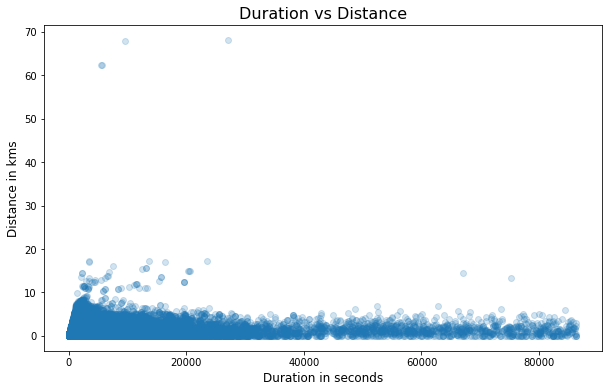

In [195]:
plt.figure(figsize=[10, 6])
plt.scatter(data=df, x = 'duration_sec', y = 'distance', alpha = 0.2)
plt.title('Duration vs Distance', fontsize=16)
plt.xlabel('Duration in seconds',fontsize=12)
plt.ylabel('Distance in kms',fontsize=12)

Text(0, 0.5, 'Duration in seconds')

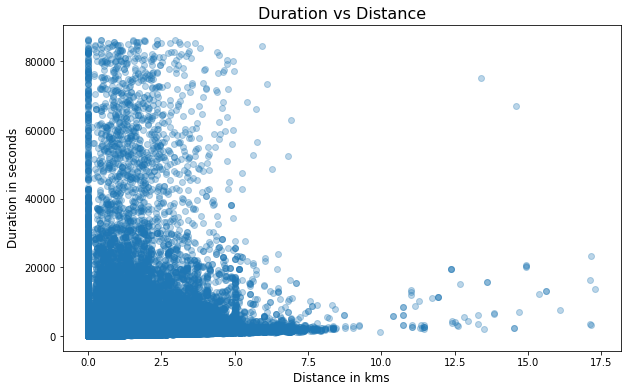

In [234]:
# due to the distance outliers the relation between distance and duration_sec is not as clear.
# Lets drop the outliers and create a plot 
df_dis_dur = df.query("distance < 20")
plt.figure(figsize=[10, 6])
plt.scatter(data = df_dis_dur, x = 'distance', y = 'duration_sec', alpha = 0.3)
plt.title('Duration vs Distance', fontsize=16)
plt.xlabel('Distance in kms',fontsize=12)
plt.ylabel('Duration in seconds',fontsize=12)

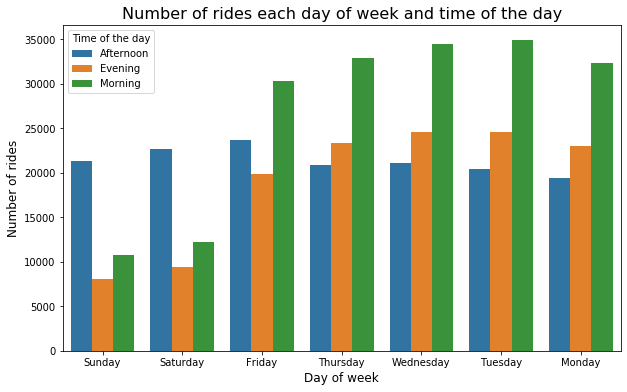

In [214]:
# plot a graph to see what time of the day rides are taken for each day of the week
plt.figure(figsize=[10, 6])
sb.countplot(data = df, x = 'day_of_week', hue = 'day_time')
plt.xlabel('Day of week', fontsize=12)
plt.ylabel('Number of rides', fontsize=12)
plt.title('Number of rides each day of week and time of the day', fontsize=16)
plt.legend(title = 'Time of the day');

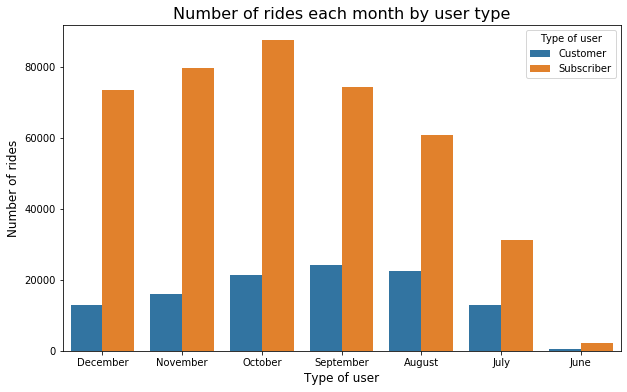

In [218]:
# plot a graph to see how different user types ride each month
plt.figure(figsize=[10, 6])
sb.countplot(data = df, x = 'month', hue = 'user_type')
plt.xlabel('Type of user', fontsize=12)
plt.ylabel('Number of rides', fontsize=12)
plt.title('Number of rides each month by user type', fontsize=16)
plt.legend(title = 'Type of user');

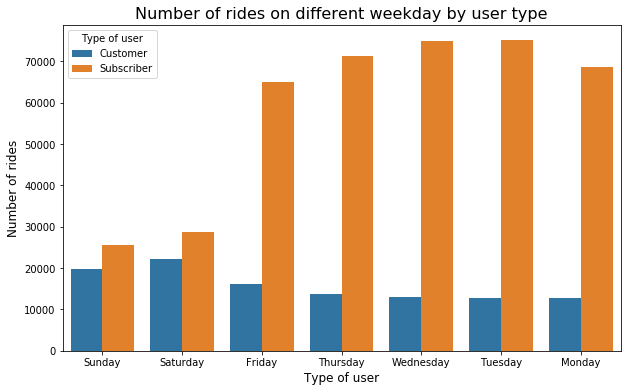

In [236]:
# plot a graph to see how different user types ride each day of week
plt.figure(figsize=[10, 6])
sb.countplot(data = df, x = 'day_of_week', hue = 'user_type')
plt.xlabel('Type of user', fontsize=12)
plt.ylabel('Number of rides', fontsize=12)
plt.title('Number of rides on different weekday by user type', fontsize=16)
plt.legend(title = 'Type of user');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> * From the above analysis it seems clear that long distance rides are rarely used. Most of the rides are of shorter distance and short duration. Which lies in the range of under 30000 secs and 7.5 kms.
* The number of rides taken during mornings is much more than ones taken in afternoon or evening during weekdays.
* While on the Weekend the number of rides in afternoon are more than ones taken during morning or evening.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Major portion of the rides taken are by the Subscribers, while customers tend to use these bikes a bit less.
The rides taken during during different day of the time also have some interesting relationship, like more rides during afternoon on weekends, while more during mornings on weekdays. Also the difference in the number of rides on weekends between customers and subscribers is much less as on weekdays.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

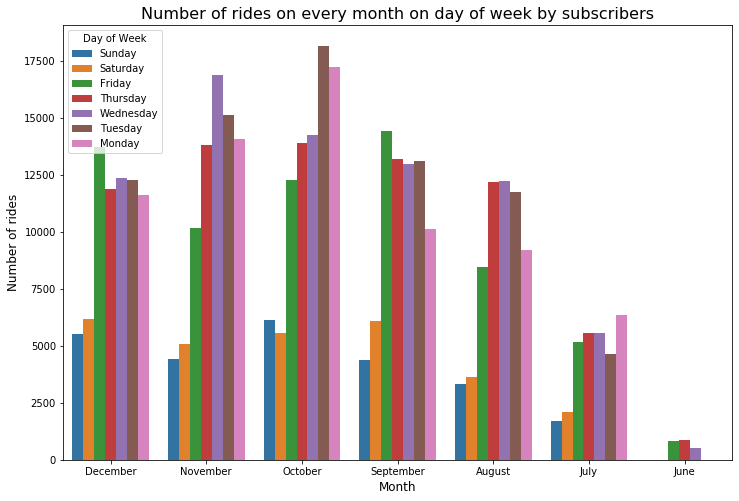

In [244]:
# plot a graph to see how different user types ride each month
plt.figure(figsize=[12, 8])
sb.countplot(data = df.query('user_type == "Subscriber"'), x = 'month', hue = 'day_of_week')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of rides', fontsize=12)
plt.title('Number of rides every month on a day of week by subscribers', fontsize=16)
plt.legend(title = 'Day of Week');

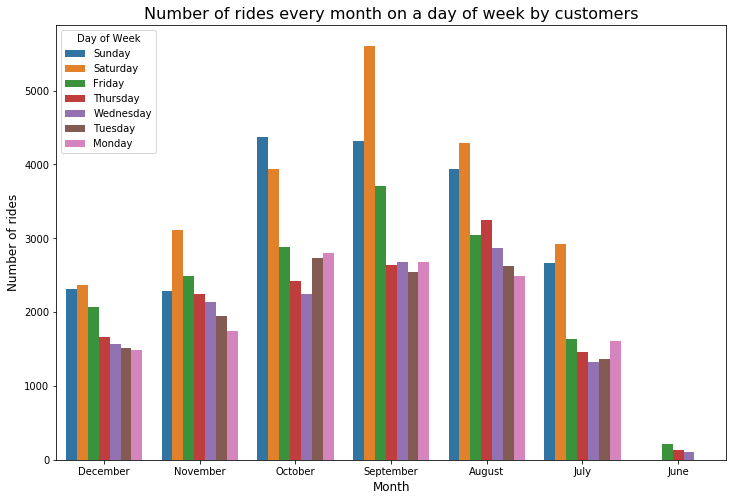

In [245]:
# plot a graph to see how different user types ride each month
plt.figure(figsize=[12, 8])
sb.countplot(data = df.query('user_type == "Customer"'), x = 'month', hue = 'day_of_week')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of rides', fontsize=12)
plt.title('Number of rides every month on a day of week by customers', fontsize=16)
plt.legend(title = 'Day of Week');

In [305]:
# create a data set for different user type with total distance travelled in each month
df_distance  = df.groupby(['user_type', 'month'])
dis_sum = df_distance.distance.sum()
user_type = df_distance[['user_type']].first()
month = df_distance[['month']].first()
df_distance = pd.concat([dis_sum, user_type, month], 1)

In [306]:
df_distance

distance   user_type      month
user_type  month                                          
Customer   August      35307.339741    Customer     August
           December    21505.061551    Customer   December
           July        18427.095501    Customer       July
           June          550.469254    Customer       June
           November    26857.790026    Customer   November
           October     36779.027820    Customer    October
           September   40040.778161    Customer  September
Subscriber August      94551.909051  Subscriber     August
           December   116094.976948  Subscriber   December
           July        45906.429682  Subscriber       July
           June         3175.472972  Subscriber       June
           November   127386.804704  Subscriber   November
           October    140396.042180  Subscriber    October
           September  117824.608551  Subscriber  September

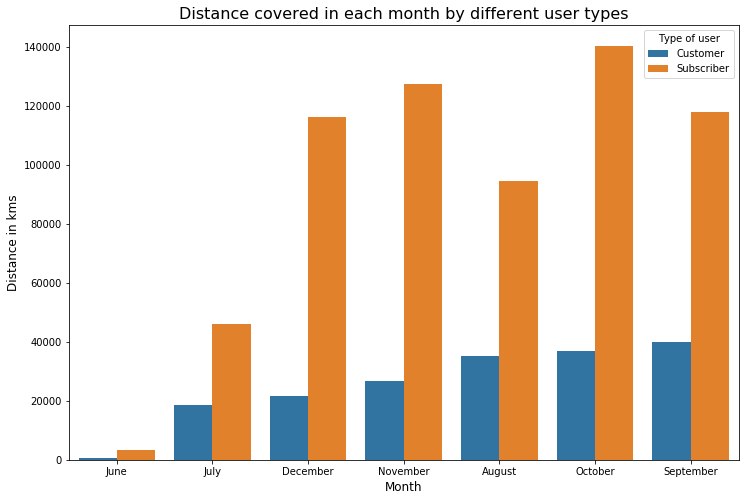

In [312]:
# plot a graph with x =  month, y = total distance for month, hue = user_type
plt.figure(figsize=[12, 8])
ax = sb.barplot(x="month", y="distance", hue="user_type", data=df_distance.sort_values('distance', ascending=True))
plt.xlabel('Month', fontsize=12)
plt.ylabel('Distance in kms', fontsize=12)
plt.title('Distance covered in each month by different user types', fontsize=16)
plt.legend(title = 'Type of user');

In [317]:
# create a data set for different user type with total duration in seconds on each weekday
df_duration  = df.groupby(['day_of_week', 'user_type'])
dur_sum = df_duration.duration_sec.sum()
user_type = df_duration[['user_type']].first()
day = df_duration[['day_of_week']].first()
df_duration = pd.concat([dur_sum, user_type, day], 1)
df_duration

duration_sec   user_type day_of_week
day_of_week user_type                                       
Friday      Customer        38557973    Customer      Friday
            Subscriber      45584266  Subscriber      Friday
Monday      Customer        32128578    Customer      Monday
            Subscriber      46685325  Subscriber      Monday
Saturday    Customer        59449141    Customer    Saturday
            Subscriber      22893652  Subscriber    Saturday
Sunday      Customer        59391201    Customer      Sunday
            Subscriber      20708358  Subscriber      Sunday
Thursday    Customer        33348839    Customer    Thursday
            Subscriber      49812509  Subscriber    Thursday
Tuesday     Customer        29915355    Customer     Tuesday
            Subscriber      52152415  Subscriber     Tuesday
Wednesday   Customer        29729949    Customer   Wednesday
            Subscriber      50797687  Subscriber   Wednesday

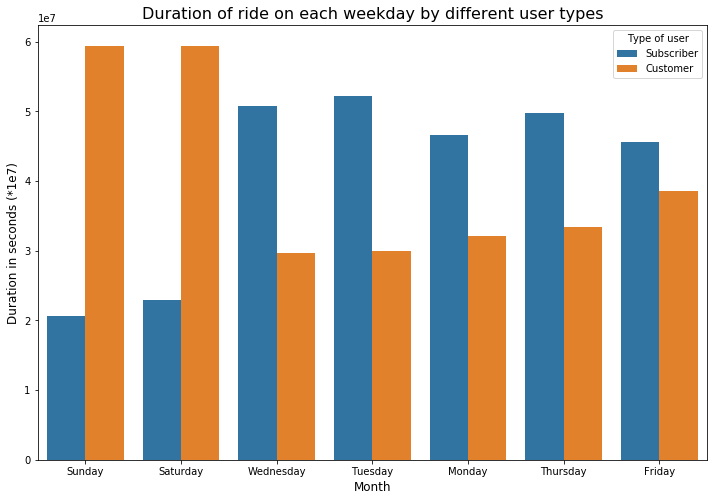

In [320]:
# plot a graph with x =  month, y = total distance for month, hue = user_type
plt.figure(figsize=[12, 8])
ax = sb.barplot(x="day_of_week", y="duration_sec", hue="user_type", data=df_duration.sort_values('duration_sec', ascending=True))
plt.xlabel('Month', fontsize=12)
plt.ylabel('Duration in seconds (*1e7)', fontsize=12)
plt.title('Duration of ride on each weekday by different user types', fontsize=16)
plt.legend(title = 'Type of user');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The further analysis strengthened the initial observation of short duration rides and shorter distances. Also subscribers using the bike more than customers. The weekdays account for most of the rides. 

### Were there any interesting or surprising interactions between features?

> Something interesting did come up. The total duration of seconds thr bikes were riddden by Customers most of it was on weekend (Saturday/Sunday). Also it looks like Tuesday's and Friday's are the days when most of the rides are concentrated.